# Turning a linear regression model into a curve of polynomial regression


# Adding polynomial terms using scikit-learn
We will now learn how to use the transformer class from
scikit-learn to add a quadratic term (d=2) to a simple regression problem with one
explanatory variable.
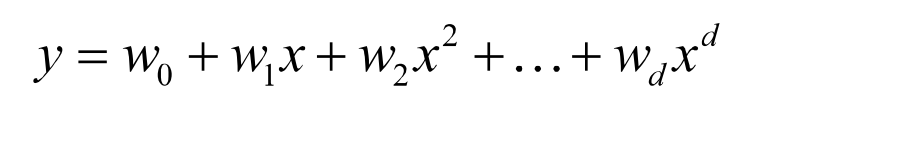

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
X=np.array([258,270,294,320,342,368,396,446,480,586])[:,np.newaxis]
y=np.array([236.4,234.4,252.8,298.6,314.2,342.2,360.8,368,391.2,
            390.8])
lr=LinearRegression()
pr=LinearRegression()
quadratic=PolynomialFeatures(degree=2)
X_quad=quadratic.fit_transform(X)

# Fit a multiple regression model on the transformed features for Linear & polynomial regression:

In [10]:
lr.fit(X,y)
pr.fit(X_quad,y)
## Create a data X_fit
X_fit=np.arange(250,600,10)[:,np.newaxis]
y_lin_fit=lr.predict(X_fit)
y_quad_fit=pr.predict(quadratic.fit_transform(X_fit))

# Plot the result
In the resulting plot,we can see that the polynomial fit captures the relationship between the response and explanatory variable much better than the linear.

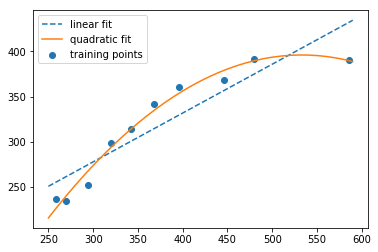

In [11]:
from matplotlib import pyplot as plt
plt.scatter(X,y,label='training points')
plt.plot(X_fit,y_lin_fit,label='linear fit',linestyle='--')
plt.plot(X_fit,y_quad_fit,label='quadratic fit')
plt.legend(loc='upper left')
plt.show()

# Compare Performance Metrics

In [12]:
y_lin_pred=lr.predict(X)
y_quad_pred=pr.predict(X_quad)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('Training MSE linear: %.3f, quadratic:%.3f'%
      (mean_squared_error(y,y_lin_pred),
       mean_squared_error(y,y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic:%.3f'%
      (r2_score(y,y_lin_pred),
       r2_score(y,y_quad_pred)))

Training MSE linear: 569.780, quadratic:61.330
Training R^2 linear: 0.832, quadratic:0.982
